In [10]:
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/srv/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/srv/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/srv/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/srv/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/srv/conda/lib/python3.6/site-packages/t

In [11]:
spamreader = pd.read_csv("badabybadabu.csv")
unano = spamreader[spamreader["Year"]==2011]
x_obs=np.array(unano["Health_expenditure_per_capita_PPP"])
y_obs=np.array(unano["Years_Lived_With_Disability"])
sigma_y_obs = np.std(y_obs)

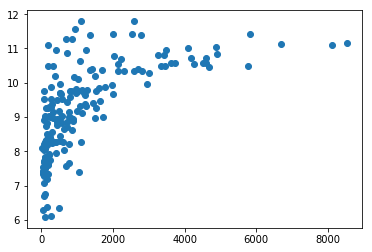

In [12]:
plt.scatter(x_obs,y_obs)

In [7]:
def modelo(x,a,b):
    return a*np.log(x+b)


def loglikelihood(x_obs, y_obs, sigma_y_obs, a, b):
    d = y_obs -  modelo(x_obs, a, b)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(a, b,c):
    p = -np.inf
    if a < 0 and b>0 and c>0 and c<8:
        p = 0.0
    return p


N = 50000
lista_a = [np.random.random()]
lista_b = [np.random.random()]
lista_c = [np.random.random()]
logposterior = [loglikelihood(x_obs, z_obs, sigma_z, lista_a[0], lista_b[0], lista_c[0]) + logprior(lista_a[0], lista_b[0], lista_c[0])]

sigma_delta_a = 0.1
sigma_delta_b = 0.1
sigma_delta_c = 1

for i in range(1,N):
    propuesta_a  = lista_a[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)
    propuesta_c  = lista_c[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_c)

    logposterior_viejo = loglikelihood(x_obs, z_obs, sigma_z, lista_a[i-1], lista_b[i-1], lista_c[i-1]) + logprior(lista_a[i-1], lista_b[i-1], lista_c[i-1])
    logposterior_nuevo = loglikelihood(x_obs, z_obs, sigma_z, propuesta_a, propuesta_b, propuesta_c) + logprior(propuesta_a, propuesta_b, propuesta_c)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_a.append(propuesta_a)
        lista_b.append(propuesta_b)
        lista_c.append(propuesta_c)
        logposterior.append(logposterior_nuevo)
    else:
        lista_a.append(lista_a[i-1])
        lista_b.append(lista_b[i-1])
        lista_c.append(lista_c[i-1])
        logposterior.append(logposterior_viejo)
lista_a = np.array(lista_a)
lista_b = np.array(lista_b)
lista_c = np.array(lista_c)
logposterior = np.array(logposterior)

new_x = np.linspace(-5,5,100)
y_model = modelo(new_x,np.mean(lista_a),np.mean(lista_b),np.mean(lista_c))
plt.errorbar(x_obs,z_obs, yerr=sigma_z, fmt='o')
plt.plot(new_x, y_model)

AttributeError: module 'numpy' has no attribute 'gamma'